In [1]:
import time
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as matdates

In [2]:
arf_dataset = np.load('processed/patient_data_acute_renal_failure.npy', allow_pickle=True).item()
arf_pids = np.load('processed/acute_renal_failure/acute_renal_failure_cases_valid.npy')

# Add admission time information to relative time offset

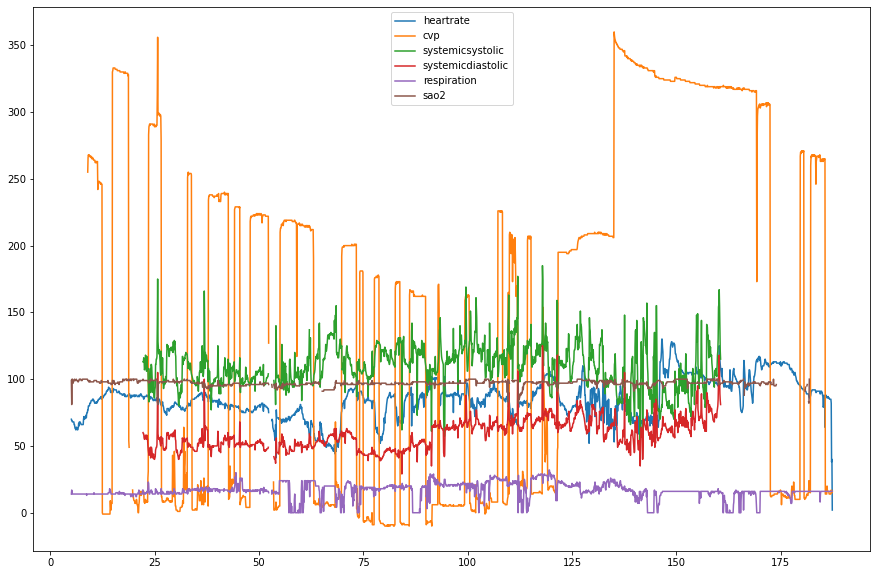

In [3]:
pid = arf_pids[0]
data = arf_dataset[pid]

admittime = data['patient']['unitadmittime24'][0]
admittime = datetime.datetime.strptime(admittime, '%H:%M:%S').time()
hour_since_admit = admittime.hour + admittime.minute / 60

vitaloffset = admittime = data['vitalperiodic']['observationoffset']
vitaloffset = vitaloffset / 60 + hour_since_admit
vitals = data['vitalperiodic']

fig, axs = plt.subplots(figsize=(15,10))
for k in vitals.keys():
    if k != 'observationoffset':
        axs.plot(vitaloffset, vitals[k], label=k)
axs.legend()

# Plot with datetime formatting

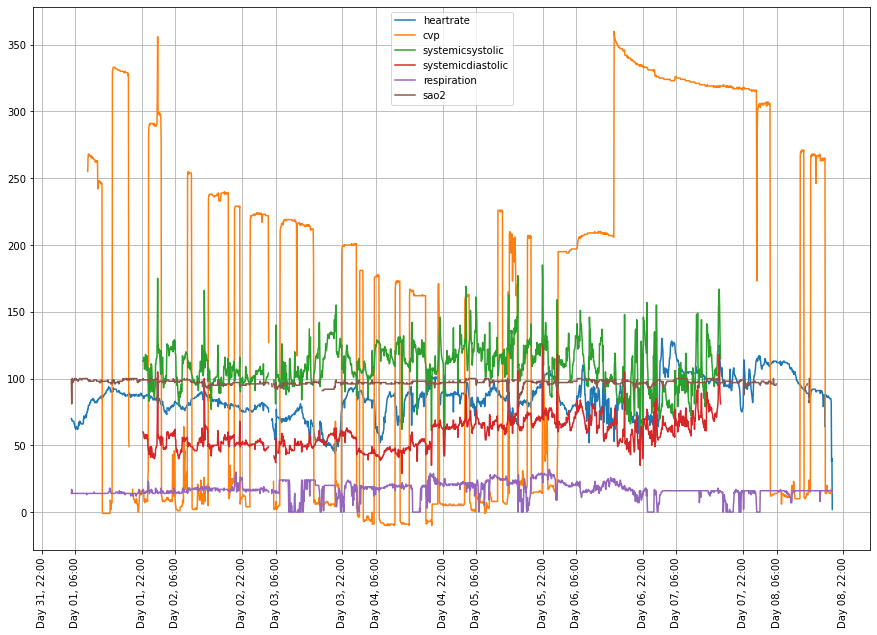

In [4]:
pid = arf_pids[0]
data = arf_dataset[pid]

admittime = data['patient']['unitadmittime24'][0]
# admittime = datetime.datetime.strptime(admittime, '%H:%M:%S').time()
# hour_since_admit = admittime.hour + admittime.minute / 60

# vitals = data['vitalperiodic']
# vitaloffset = vitals['observationoffset']
# vitaloffset = vitaloffset / 60 + hour_since_admit

admittime = datetime.datetime.strptime(admittime, '%H:%M:%S')
vitals = data['vitalperiodic']
vitaloffset = vitals['observationoffset']
vitaloffset = [datetime.timedelta(minutes=offset.astype(np.float64)) for offset in vitaloffset]

ts = [admittime + offset for offset in vitaloffset]


fig, ax = plt.subplots(figsize=(15,10))
for k in vitals.keys():
    if k != 'observationoffset':
        ax.plot(ts, vitals[k], label=k)
ax.legend()
ax.grid()

locator = matdates.HourLocator(byhour=[6,22])
locator.MAXTICKS  = 40000
majorFmt = matdates.DateFormatter('Day %d, %H:%M')  

ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(majorFmt)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
plt.show()

# Plot patient data statistics with aligned timestamp

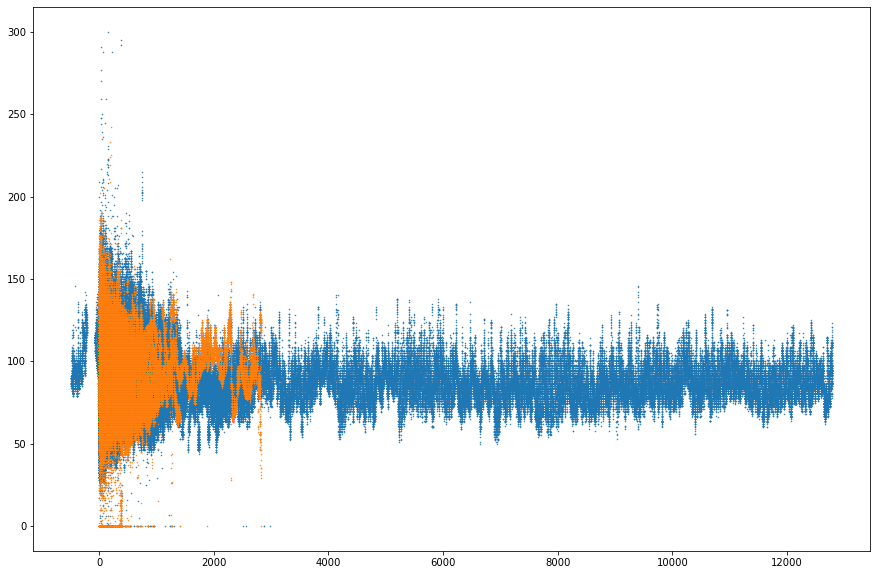

In [5]:
x_live = []
y_live = []
x_expired = []
y_expired = []


for pid in arf_pids:
    data = arf_dataset[pid]
    
    admittime = data['patient']['unitadmittime24'][0]
    admittime = datetime.datetime.strptime(admittime, '%H:%M:%S').time()
    hour_since_admit = admittime.hour + admittime.minute / 60

    signal_source = data['vitalperiodic']
    signal = signal_source['heartrate']
    offset = signal_source['observationoffset']
    offset = offset / 60 + hour_since_admit

    if data['patient']['unitdischargestatus'][0] == 'Alive':
        x_live += list(offset)
        y_live += list(signal)
    elif data['patient']['unitdischargestatus'][0] == 'Expired':
        x_expired += list(offset)
        y_expired += list(signal)
        
fig, ax = plt.subplots(figsize=(15,10))

ax.plot(x_live, y_live, marker='.', ms=1, linestyle = 'None')
ax.plot(x_expired, y_expired, marker='.', ms=1, linestyle = 'None')

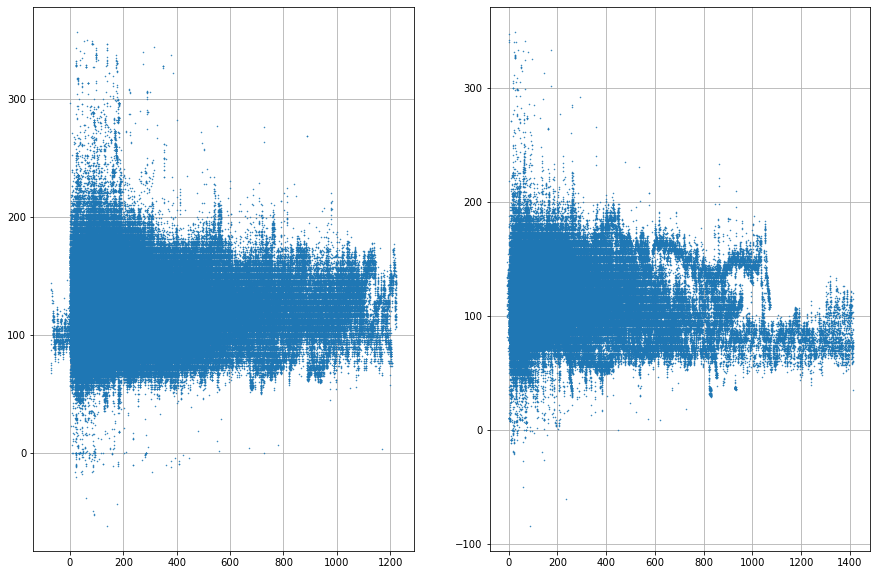

In [6]:
x_live = []
y_live = []
x_expired = []
y_expired = []


for pid in arf_pids:
    data = arf_dataset[pid]
    
    admittime = data['patient']['unitadmittime24'][0]
    admittime = datetime.datetime.strptime(admittime, '%H:%M:%S').time()
    hour_since_admit = admittime.hour + admittime.minute / 60

    signal_source = data['vitalperiodic']
    signal = signal_source['systemicsystolic']
    offset = signal_source['observationoffset']
    offset = offset / 60 + hour_since_admit

    if data['patient']['unitdischargestatus'][0] == 'Alive':
        x_live += list(offset)
        y_live += list(signal)
    elif data['patient']['unitdischargestatus'][0] == 'Expired':
        x_expired += list(offset)
        y_expired += list(signal)
        
        
fig, ax = plt.subplots(1,2,figsize=(15,10))

ax[0].plot(x_live, y_live, marker='.', ms=1, linestyle = 'None')
ax[0].grid()
ax[1].plot(x_expired, y_expired, marker='.', ms=1, linestyle = 'None')
ax[1].grid()

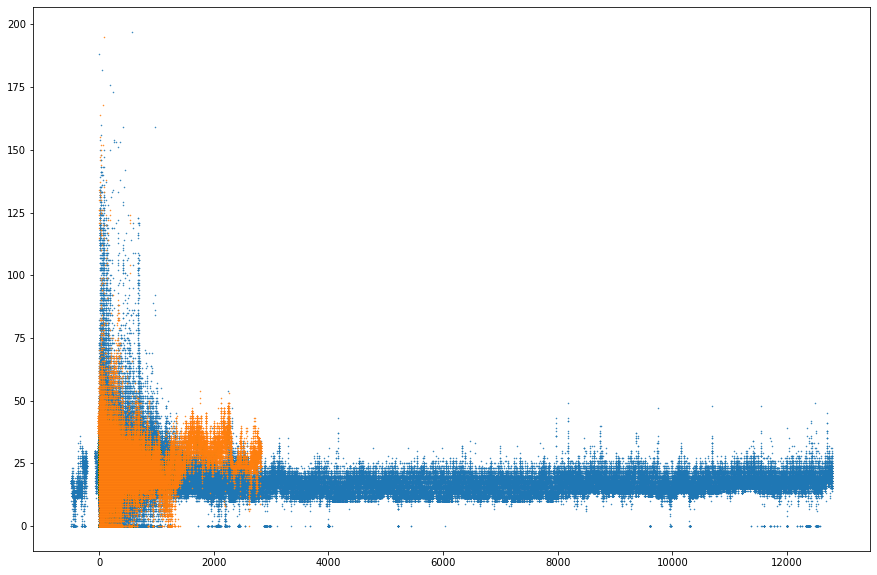

In [7]:
x_live = []
y_live = []
x_expired = []
y_expired = []


for pid in arf_pids:
    data = arf_dataset[pid]
    
    admittime = data['patient']['unitadmittime24'][0]
    admittime = datetime.datetime.strptime(admittime, '%H:%M:%S').time()
    hour_since_admit = admittime.hour + admittime.minute / 60

    signal_source = data['vitalperiodic']
    signal = signal_source['respiration']
    offset = signal_source['observationoffset']
    offset = offset / 60 + hour_since_admit

    if data['patient']['unitdischargestatus'][0] == 'Alive':
        x_live += list(offset)
        y_live += list(signal)
    elif data['patient']['unitdischargestatus'][0] == 'Expired':
        x_expired += list(offset)
        y_expired += list(signal)
        
fig, ax = plt.subplots(figsize=(15,10))

ax.plot(x_live, y_live, marker='.', ms=1, linestyle = 'None')
ax.plot(x_expired, y_expired, marker='.', ms=1, linestyle = 'None')

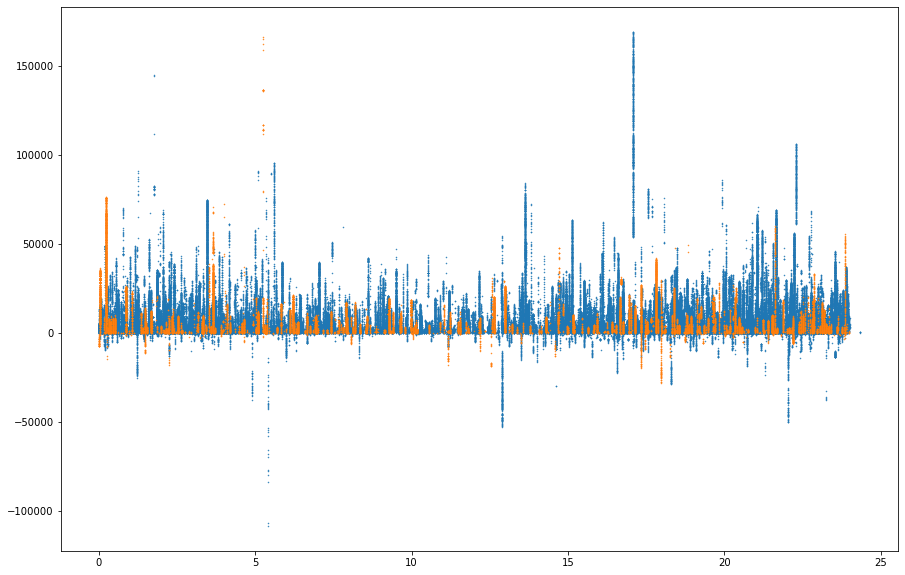

In [8]:
x_live = []
y_live = []
x_expired = []
y_expired = []


for pid in arf_pids:
    data = arf_dataset[pid]
    
    admittime = data['patient']['unitadmittime24'][0]
    admittime = datetime.datetime.strptime(admittime, '%H:%M:%S').time()
    hour_since_admit = admittime.hour + admittime.minute / 60

    signal_source = data['intakeoutput']
    signal = signal_source['urine'][:,1]
    offset = signal_source['urine'][:,0]
    offset = offset / 60 + hour_since_admit

    if data['patient']['unitdischargestatus'][0] == 'Alive':
        x_live += list(offset)
        y_live += list(signal)
    elif data['patient']['unitdischargestatus'][0] == 'Expired':
        x_expired += list(offset)
        y_expired += list(signal)
        
        
fig, ax = plt.subplots(figsize=(15,10))

ax.plot(x_live, y_live, marker='.', ms=1, linestyle = 'None')
ax.plot(x_expired, y_expired, marker='.', ms=1, linestyle = 'None')

(-10000.0, 20000.0)

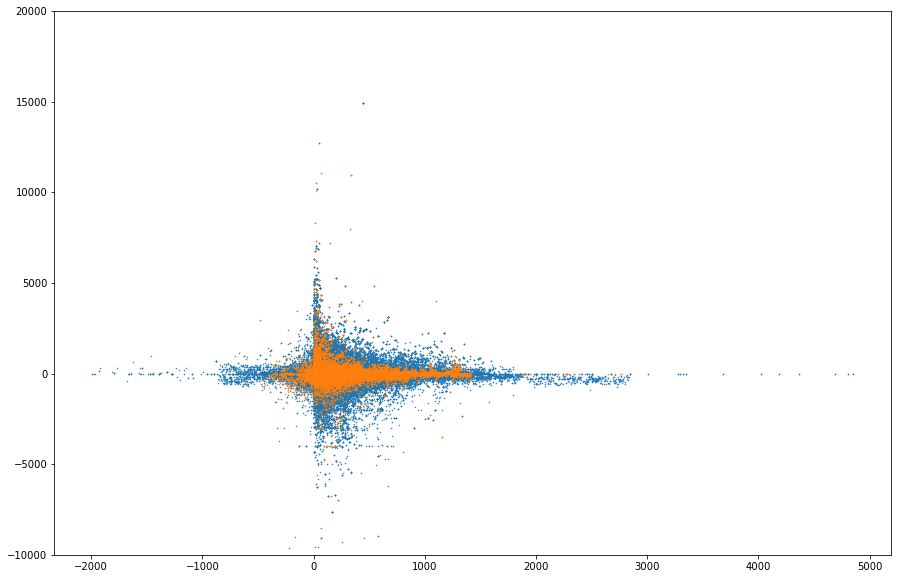

In [9]:
x_live = []
y_live = []
x_expired = []
y_expired = []


for pid in arf_pids:
    data = arf_dataset[pid]
    
    admittime = data['patient']['unitadmittime24'][0]
    admittime = datetime.datetime.strptime(admittime, '%H:%M:%S').time()
    hour_since_admit = admittime.hour + admittime.minute / 60

    signal_source = data['intakeoutput']
    signal = signal_source['nettotal']
    offset = signal_source['offset']
    offset = offset / 60 + hour_since_admit

    if data['patient']['unitdischargestatus'][0] == 'Alive':
        x_live += list(offset)
        y_live += list(signal)
    elif data['patient']['unitdischargestatus'][0] == 'Expired':
        x_expired += list(offset)
        y_expired += list(signal)
        
        
fig, ax = plt.subplots(figsize=(15,10))

ax.plot(x_live, y_live, marker='.', ms=1, linestyle = 'None')
ax.plot(x_expired, y_expired, marker='.', ms=1, linestyle = 'None')
ax.set_ylim([-10000, 20000])
